# Importing Libraries

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# Load dataset

In [16]:
df = pd.read_csv('creditcard.csv')

# Explore data

In [17]:
print(df.head())
print(df.info())
print(df.describe())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

# Check for missing values

In [18]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        1
V10       1
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64


# Drop rows with NaN in the target variable

In [33]:
df = df.dropna(subset=['Class'])


# Distribution of the target variable

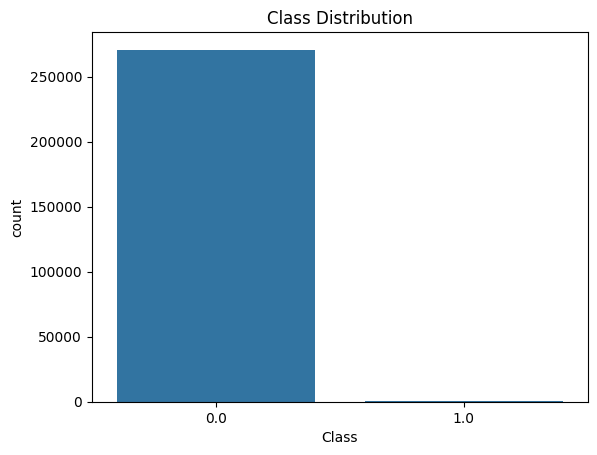

In [25]:
sns.countplot(x='Class', data=df)
plt.title('Class Distribution')
plt.show()

# Correlation heatmap

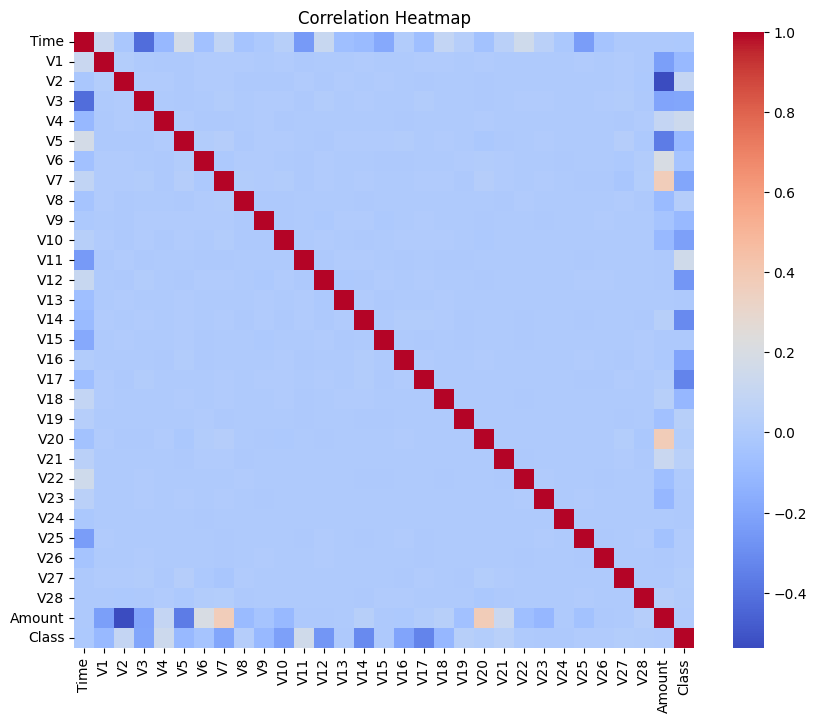

In [26]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Data preprocessing

In [27]:
X = df.drop('Class', axis=1)
y = df['Class']

# Standardize features

In [28]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Train-test split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Initialize models

In [30]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=100)
}

# Train and evaluate models

Logistic Regression Results:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     54162
         1.0       0.85      0.62      0.72        96

    accuracy                           1.00     54258
   macro avg       0.92      0.81      0.86     54258
weighted avg       1.00      1.00      1.00     54258

Confusion Matrix:
[[54151    11]
 [   36    60]]
ROC AUC Score: 0.9721229829031425

Decision Tree Results:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     54162
         1.0       0.81      0.80      0.81        96

    accuracy                           1.00     54258
   macro avg       0.91      0.90      0.90     54258
weighted avg       1.00      1.00      1.00     54258

Confusion Matrix:
[[54144    18]
 [   19    77]]
ROC AUC Score: 0.9008754985044867

Random Forest Results:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     

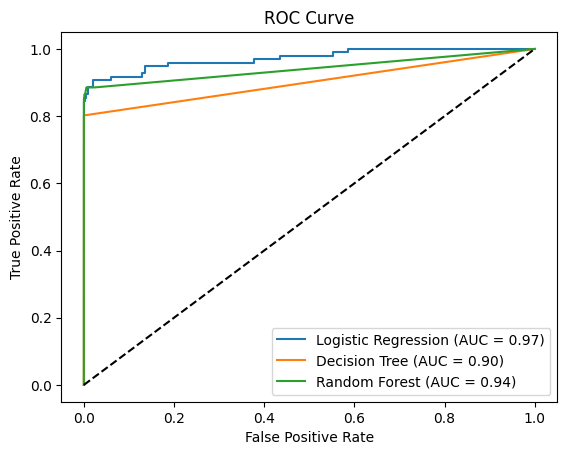

In [32]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    print(f"{name} Results:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_proba)}\n")

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc_score(y_test, y_pred_proba):.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()